-[Cross validation using grid search](https://www.kaggle.com/code/muhammetvarl/keras-multiclass-classification-cross-validation)

-[resnet50Docs](https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet50)

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import scipy.signal
import keras
import ipywidgets as widgets
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


(89400, 5)
(89400, 16, 16, 3)
(595, 5)
(595, 16, 16, 3)
[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 2

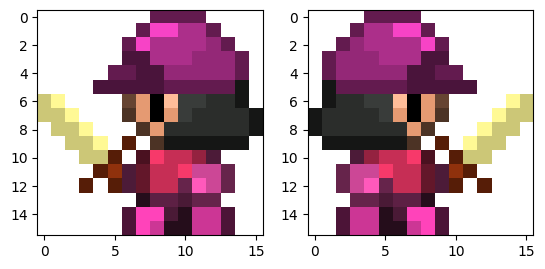

In [55]:
data = np.load('./Dataset1/sprites_labels.npy')
sprites = np.load('./Dataset1/sprites.npy')

print(data.shape)
print(sprites.shape)

selected_data = data[:894]
selected_data = np.delete(selected_data, slice(244, 543), axis=0) #deletes duplicates
print(selected_data.shape)

selected_sprites = sprites[:894]
selected_sprites = np.delete(selected_sprites, slice(244, 543), axis=0) #deletes duplicates
print(selected_sprites.shape)

data_with_mirrored = np.concatenate((selected_data, selected_data), axis=0)

mirrored_sprites = np.flip(selected_sprites, axis=2)
sprites_with_mirrored = np.concatenate((selected_sprites, mirrored_sprites), axis=0)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(selected_sprites[1])
ax[1].imshow(mirrored_sprites[1]);

print(sprites_with_mirrored)


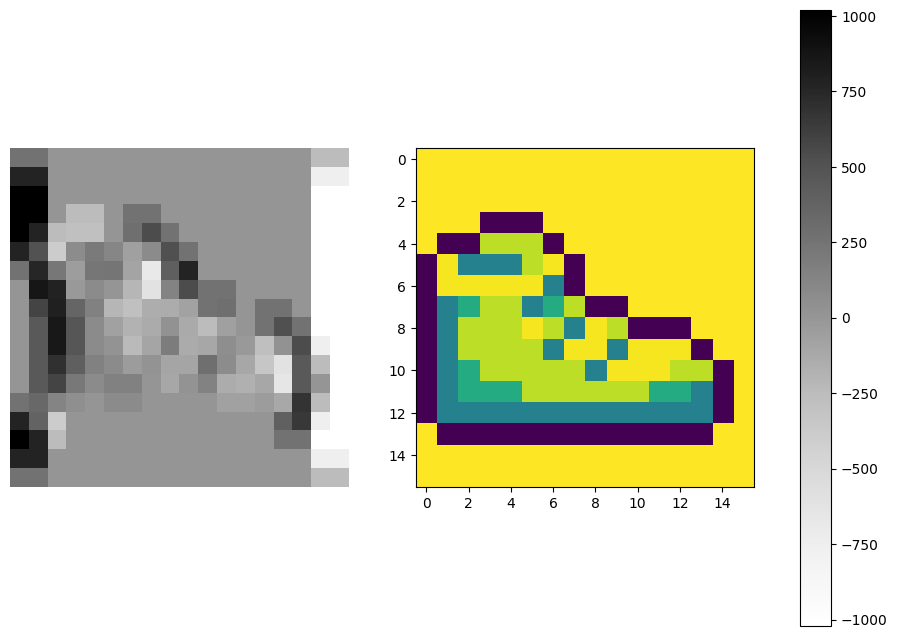

In [56]:
X_train, X_test, y_train, y_test = train_test_split(sprites_with_mirrored, data_with_mirrored)

y_train_one_hot = tf.keras.utils.to_categorical(y_train, 5)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 5)



fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


conv_result = scipy.signal.convolve2d(X_train[400, :, :, :1].reshape(16, 16), np.array([[1,2,1],[0,0,0],[-1,-2,-1]]).T)
im = ax.imshow(conv_result, cmap='Greys')
ax2.imshow(X_train[400, :, :, :1])
ax.axis('off')
fig.colorbar(im, ax=[ax, ax2]);



In [57]:


'''
conv_network = tf.keras.Sequential()

conv_network.add(tf.keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,1)))
conv_network.add(tf.keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,1)))
conv_network.add(tf.keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,1)))
conv_network.add(tf.keras.layers.Flatten())

conv_network.add(tf.keras.layers.Dense(100, activation='relu'))
conv_network.add(tf.keras.layers.Dense(10, activation='softmax'))

'''




data1 = np.load('./Dataset1/sprites_labels.npy')
sprites1 = np.load('./Dataset1/sprites.npy')

selected_labels = data1[:894]
y = np.delete(selected_labels, slice(244, 543), axis=0)

selected_sprites = sprites1[:894]
X = np.delete(selected_sprites, slice(244, 543), axis=0)

X = X.astype(np.float32) / 255









In [58]:
model = keras.models.Sequential([
    keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,3)),
    #keras.layers.Conv2D(196, (3, 3), strides=(1,1), activation='relu', input_shape=(16,16,3)),
    keras.layers.Flatten(input_shape=(16, 16, 3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation='softmax')
]);

#other activations functions tried include sigmoid and different orders of relu and softmax

C:\Users\cjbea\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\cjbea\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
predictions = model(X_train[:1]).numpy()
print(predictions)

[[4.2251807e-32 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2055077e-31]]


In [60]:
tf.nn.softmax(predictions).numpy()

array([[0.14884758, 0.40460962, 0.14884758, 0.14884758, 0.14884758]],
      dtype=float32)

In [61]:
loss_fn = keras.losses.CategoricalCrossentropy()


In [62]:
loss_fn(y_train[:1], predictions).numpy()

16.118095

In [63]:
'''
loss_fn1 = keras.losses.CategoricalFocalCrossentropy()
loss_fn1(y_train[:1], predictions).numpy()
'''

#loss_fn2 = keras.losses.SparseCategoricalCrossentropy()
#loss_fn2(y_train[:2], predictions).numpy()

model.compile(optimizer='Adam', loss=loss_fn, metrics=['accuracy'])

#Tried with RMSProp, SGD, Adadelta. Adam appears to have the most acc

In [64]:
historyConv = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 100, epochs=20)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.3278 - loss: 84.0729 - val_accuracy: 0.7047 - val_loss: 13.4096
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5760 - loss: 20.3972 - val_accuracy: 0.7148 - val_loss: 2.6120
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6029 - loss: 2.3859 - val_accuracy: 0.6779 - val_loss: 0.8546
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6536 - loss: 1.0004 - val_accuracy: 0.6946 - val_loss: 0.8982
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6554 - loss: 0.9300 - val_accuracy: 0.7248 - val_loss: 0.6918
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6816 - loss: 0.7453 - val_accuracy: 0.7248 - val_loss: 0.6194
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6746 - loss: 0.6936 - val_accuracy: 0.7315 - val_loss: 0.6018
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7027 - loss: 0.6091 - val_accuracy: 0.7349 - val_loss: 0.5472

In [65]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 49)       │         1,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2401)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       153,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 466,277 (1.78 MB)

 Trainable params: 155,425 (607.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 310,852 (1.19 MB)

(0.85, 1.0)

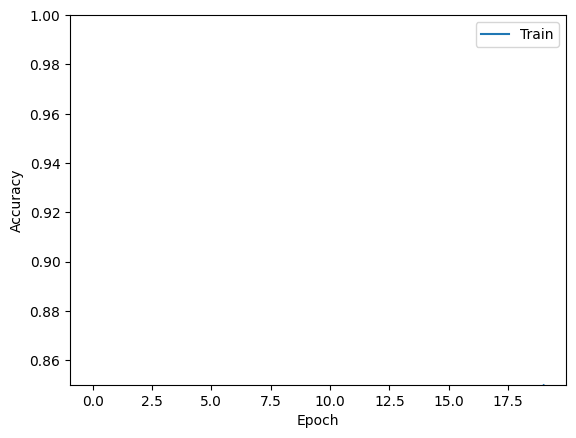

In [66]:
plt.plot(historyConv.history['accuracy'], label='Train')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0.85, 1])

In [67]:
model.evaluate(X_test, y_test, verbose=2)

10/10 - 0s - 5ms/step - accuracy: 0.8993 - loss: 0.4213


[0.42126137018203735, 0.899328887462616]

In [68]:
probability_model = keras.Sequential([model, keras.layers.Softmax()])
probability_model(X_test[:5])

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0.20775272, 0.1706206 , 0.22658037, 0.22219655, 0.17284974],
       [0.40460962, 0.14884758, 0.14884758, 0.14884758, 0.14884758],
       [0.14884758, 0.14884758, 0.14884758, 0.40460962, 0.14884758],
       [0.14884758, 0.14884758, 0.14884758, 0.40460962, 0.14884758],
       [0.14885978, 0.14885014, 0.14885014, 0.40458944, 0.14885047]],
      dtype=float32)>

In [69]:
import ipywidgets as widgets
label_names = ['Character (FORWARD)', 'Monster', 'Food', 'Item', 'Character (SIDE)']
index_slider = widgets.IntSlider(value=0, min=0, max=len(X_test)-1, description='Image index:')
def show_image(index):
    plt.imshow(X_test[index])
    plt.show()
    prediction = probability_model(X_test[index:index+1]).numpy()
    print(f'Predicted label: {np.argmax(prediction)} ({label_names[np.argmax(prediction)]})')
    print(f'Actual label: {np.argmax(y_test[index])} ({label_names[np.argmax(y_test[index])]})')
    print('Predicted probabilities:')
    print(f'    Character (FORWARD): {'%.2f' % (prediction[0][0] * 100)}%')
    print(f'    Monster:             {'%.2f' % (prediction[0][1] * 100)}%')
    print(f'    Food:                {'%.2f' % (prediction[0][2] * 100)}%')
    print(f'    Item:                {'%.2f' % (prediction[0][3] * 100)}%')
    print(f'    Character (SIDE):    {'%.2f' % (prediction[0][4] * 100)}%')
widgets.interactive(show_image, index=index_slider)

interactive(children=(IntSlider(value=0, description='Image index:', max=297), Output()), _dom_classes=('widge…

In [70]:
def create_model(optimizer="adam"):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,3)))
    model.add(keras.layers.Flatten(input_shape=(16, 16, 3)))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(5, activation='softmax'))
    
   
    model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=["accuracy"])
    return model

X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


optimizerGrid = ['Adam', 'Adadelta', 'SGD', 'AdamW', 'Adafactor']
param_grid = {
    'epochs' : [10, 50, 100],
    'batch_size' : [32, 50, 100],
    'optimizer' : optimizerGrid
}


model_cv = KerasClassifier(build_fn=create_model, verbose=1)

grid = GridSearchCV(estimator=model_cv,  
                    n_jobs=-1, 
                    verbose=1,
                    cv=5,
                    param_grid=param_grid)
grid_cv_model = grid.fit(X_cv, y_cv,)


y_pred = grid_cv_model.predict(X_test)

print("Accuracy: ", np.mean(y_test == y_pred))

means = grid_cv_model.cv_results_['mean_test_score'] # Mean of test scores
stds = grid_cv_model.cv_results_['std_test_score'] # standard deviations of test scores
params = grid_cv_model.cv_results_['params'] # parameters used
# to print all scores, standard deviations and parameters used

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Printing the Best Parameters as a Result of Grid Search Cross Validation on the Screen
print("Best: %f using %s" % (grid_cv_model.best_score_, grid_cv_model.best_params_))


#cross val with grid cv
cv_model = grid_cv_model.best_estimator_
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(cv_model, X_test, np.argmax(y_test, axis=1), cv=kfold,scoring= 'accuracy')




Fitting 5 folds for each of 45 candidates, totalling 225 fits


In [ ]:
#print kfold results
print('K-fold Cross Validation Accuracy Results: ', results)
print('K-fold Cross Validation Accuracy Results Mean: ', results.mean())

In [ ]:
#evaluating acc of resNet50 model compaired to our model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

resNet50Model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(16, 16, 3),
    pooling=None,
    classes=5,
    classifier_activation='softmax'
)

for layer in resNet50Model.layers:
    layer.trainable=False
    
dnn_model = keras.models.Sequential()
dnn_model.add(resNet50Model)
dnn_model.add(keras.layers.Flatten())
dnn_model.add(keras.layers.Dense(512, activation='relu'))
dnn_model.add(keras.layers.Dense(5, activation='softmax'))

dnn_model.summary()
dnn_model.compile(optimizer=keras.optimizers.Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


resnetHistory = dnn_model.fit(X_train, validation_data = X_test, epochs = 20)

ValueError: If using `weights='imagenet'` with `include_top=True`, `classes` should be 1000.  Received classes=5